# CREDIT CARD FRAUD DETECTION

## Using Unbalanced and Structured Data

###  Importing the required libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing"
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
#from colorama import Fore, Style, init;

### Loading the dataset


In [2]:
df=pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df.head(5) #returns the first 5 rows of the dataset.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.tail(5)# returns the last 5 rows of the dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
df.isnull().sum()#returns the null sum which present in the dataset.

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.info() # returns the information about the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.drop_duplicates(inplace=True)

## spliting and Training The dataset

In [8]:
df.shape

(283726, 31)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Class', ylabel='count'>

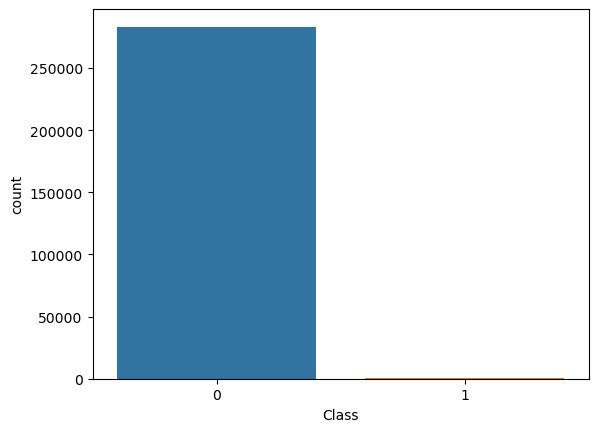

In [10]:
sns.countplot(x='Class',data=df)

<Axes: ylabel='Amount'>

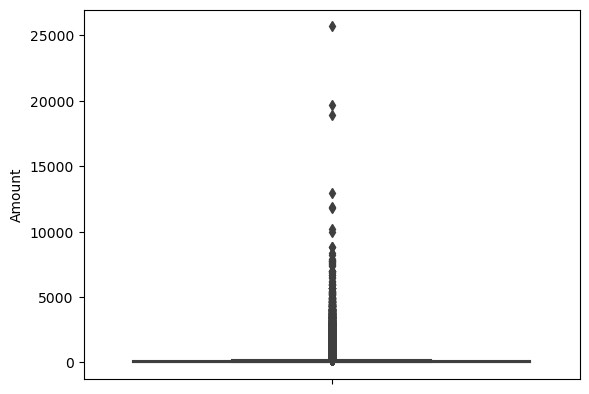

In [11]:
# outlier identification using boxplot
sns.boxplot(y=df['Amount'])

<Axes: >

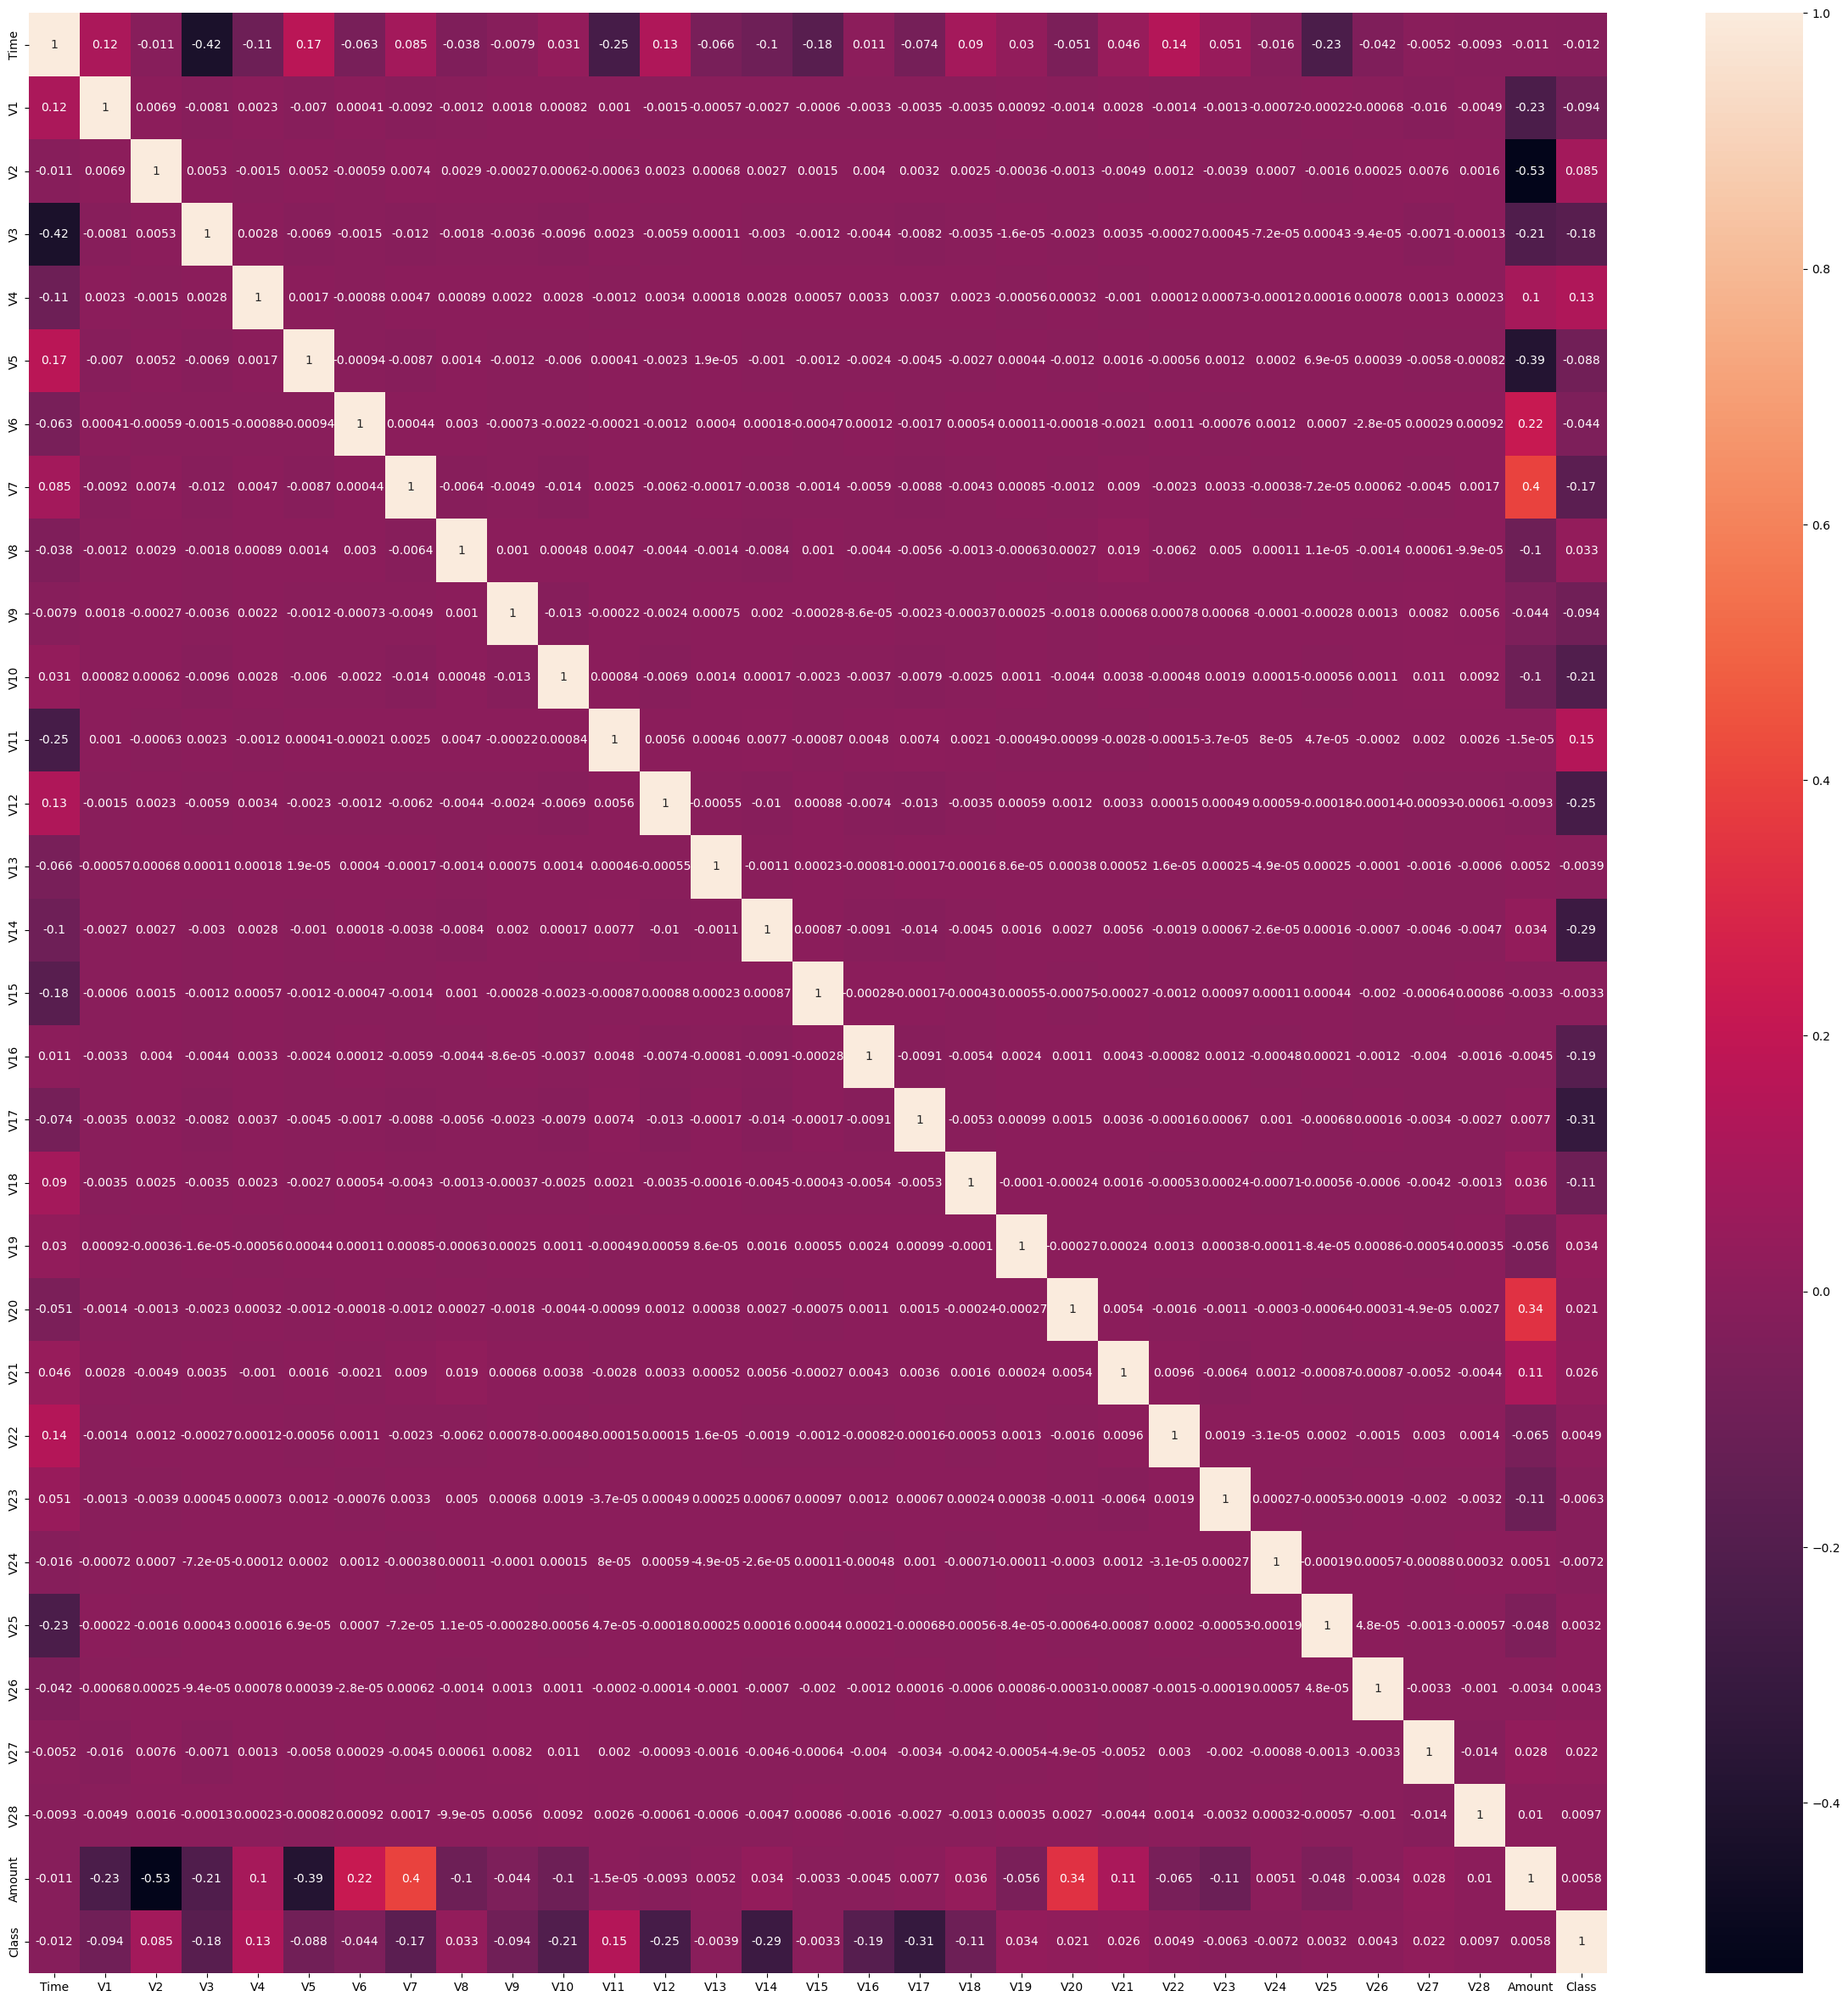

In [12]:
# heat map
plt.figure(figsize=[30,30])
sns.heatmap(df.corr(),annot=True)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


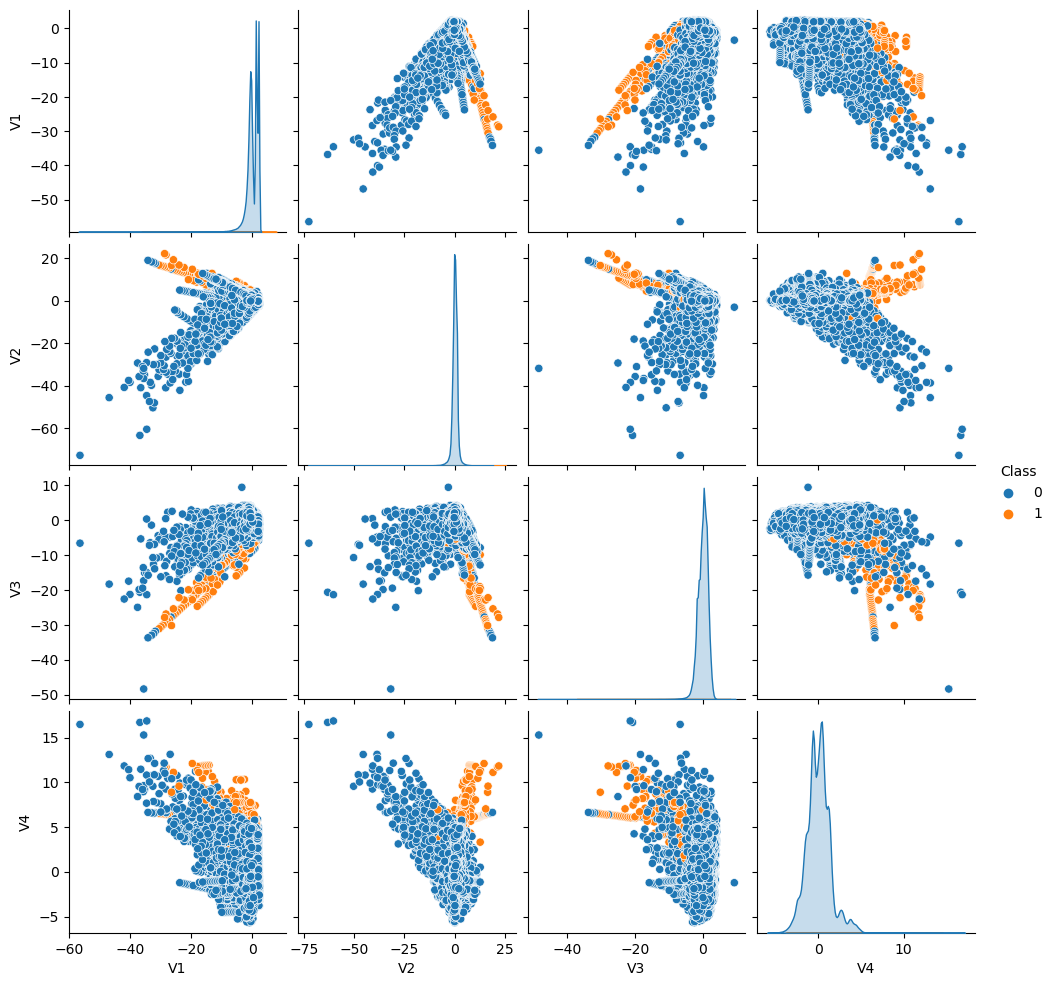

In [13]:
# Cols to Plot 
columns_to_plot =['V1', 'V2', 'V3', 'V4','Class']

# Data Columns
data_to_plot = df[columns_to_plot]

# Creating the pairplot with the specified palette for categorical variables
sns.pairplot(data_to_plot, hue='Class')
plt.show()

In [14]:
X=df.drop(columns='Class',axis=1)
y=df['Class']

## Spliting and Training the Dataset.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
# dt=DecisionTreeClassifier(random_state=42)
# dt.fit(X_train,y_train)
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
79119,57873.0,-1.353894,-1.081034,1.787587,-1.803254,-0.235223,2.177295,1.014795,0.549627,0.629906,...,0.420106,0.182520,0.367052,0.805029,-0.981966,-0.783392,0.905245,-0.176870,-0.093081,318.00
265736,162025.0,-0.059936,0.582525,-1.369698,-1.100370,3.707608,3.396709,1.218666,0.541196,-0.507983,...,-0.103629,0.069615,0.311566,-0.268906,0.690685,0.463247,-0.637914,-0.121454,-0.196513,33.32
42801,41251.0,-0.362164,0.715165,1.783253,0.230848,-0.240500,-0.508633,0.589763,-0.013746,-0.048097,...,-0.036132,-0.212595,-0.515372,-0.044853,0.385330,-0.126762,0.139889,0.031010,0.057977,19.99
172689,121201.0,-0.370982,0.446004,-0.732017,-1.088288,1.799175,-1.117223,1.502962,-0.553382,-0.240976,...,-0.233555,0.263039,0.937860,-0.198459,0.728053,0.203829,-0.522782,-0.376116,-0.103404,6.30
179949,124306.0,0.695644,0.177228,0.481414,-0.338853,-0.122807,0.074431,-0.509006,-0.775719,0.982836,...,-0.275961,0.956704,0.468104,-0.195806,0.709315,0.487912,-0.246186,0.196872,0.197452,9.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120348,75794.0,-0.188193,-3.244306,-1.083455,0.136170,-1.626809,-0.517792,0.786109,-0.401554,-0.642671,...,1.137602,0.011795,-1.341362,-0.791988,-0.064471,0.141139,1.038062,-0.238098,0.136452,849.40
260136,159419.0,0.149260,0.988698,-0.605170,-0.788264,1.238822,-0.203064,0.861209,0.067349,-0.279204,...,0.045101,-0.326673,-0.816542,0.008957,-0.010456,-0.377837,0.128193,0.219217,0.068558,0.89
132427,79983.0,1.259310,-0.049484,-0.721776,0.071903,1.864771,3.635628,-0.821682,0.929256,0.128685,...,-0.003257,0.070189,0.104264,-0.107993,1.004823,0.674600,-0.275199,0.045933,0.025074,4.50
147428,88536.0,1.982903,-0.134427,-1.161183,0.472515,-0.043755,-1.080473,0.306983,-0.373167,0.454594,...,-0.110161,-0.212230,-0.472417,0.248672,0.025584,-0.195097,0.272711,-0.071660,-0.055715,39.48


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

[[-0.77717232 -0.69712346 -0.65378113 ... -0.45050471 -0.28613705
   0.90921189]
 [ 1.41573069 -0.03297944  0.35495872 ... -0.31091542 -0.60165535
  -0.21863125]
 [-1.12714577 -0.18810283  0.43538871 ...  0.0731303   0.17466732
  -0.27144194]
 ...
 [-0.31164996  0.64414423 -0.02827519 ...  0.11072017  0.07429506
  -0.33281011]
 [-0.13156797  1.01553945 -0.07978255 ... -0.1854883  -0.17215102
  -0.1942266 ]
 [-0.38376276 -0.24096194  0.49800783 ... -0.33464112 -0.14752314
  -0.35063818]]


<Axes: >

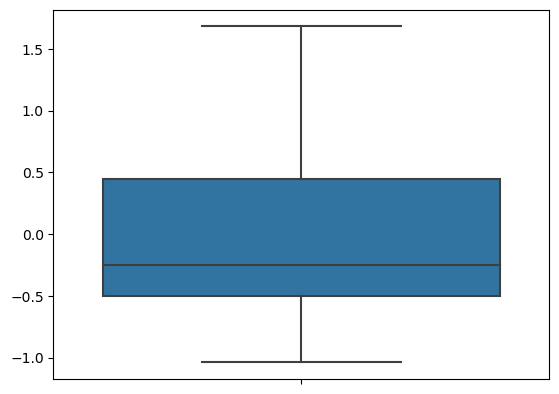

In [19]:
print(X_train)
sns.boxplot(y=X_train[-1])

## Random Forest Classifier

In [20]:
#Random forest 
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=42)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10,
                       random_state=42)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = rfc.predict(X_test)

print("Predicted values:")
print(y_pred)
print("Accuracy:"),accuracy_score(y_test,y_pred)*100
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred)*100)

Predicted values:
[0 0 0 ... 0 0 0]
Accuracy:
Confusion Matrix:
 [[56655     1]
 [   54    36]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.40      0.57        90

    accuracy                           1.00     56746
   macro avg       0.99      0.70      0.78     56746
weighted avg       1.00      1.00      1.00     56746


Accuracy Score: 99.90307686885419


In [22]:
y_train_pred=rfc.predict(X_train)
print('Train Accuracy ',accuracy_score(y_train,y_train_pred)*100)
#rfc.score(X_train,y_train)

Train Accuracy  99.90307516080712


## Logistics regression Model

In [23]:
from sklearn.linear_model import LogisticRegression
Log=LogisticRegression(random_state=42)
Log.fit(X_train,y_train)
y_pred=Log.predict(X_test)


In [24]:

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred)*100)

Confusion Matrix:
 [[56650     6]
 [   40    50]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.89      0.56      0.68        90

    accuracy                           1.00     56746
   macro avg       0.95      0.78      0.84     56746
weighted avg       1.00      1.00      1.00     56746


Accuracy Score: 99.91893701758714


In [25]:
y_train_pred=Log.predict(X_train)
print('Train accuracy',accuracy_score(y_train,y_train_pred)*100)

Train accuracy 99.91893558903868


## XgBoostClassifier

In [26]:
#!pip3 install xgboost

In [27]:
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [28]:
XGB =XGBClassifier()
XGB.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [29]:
y_pred=XGB.predict(X_test)
print("XGB Model")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred)*100,"%")

XGB Model
Confusion Matrix:
 [[56653     3]
 [   25    65]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.96      0.72      0.82        90

    accuracy                           1.00     56746
   macro avg       0.98      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746


Accuracy Score: 99.95065731505305 %


In [30]:
y_train_pred=Log.predict(X_train)
print('Train accuracy',accuracy_score(y_train,y_train_pred)*100)

Train accuracy 99.91893558903868


# ENSEMBLE METHODS

## By using VotingClassifier

In [31]:
# Create the individual models
from sklearn.ensemble import VotingClassifier
rf = RandomForestClassifier()
lr = LogisticRegression()
xgb = XGBClassifier()

# Create the ensemble model
ensemble = VotingClassifier(estimators=[('rf', rf), ('lr', lr), ('xgb', xgb)], voting='hard')# Train the ensemble model
ensemble.fit(X_train, y_train)


VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('lr', LogisticRegression()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))])

In [32]:
y_pred = ensemble.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:',accuracy*100)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 99.94889507630494
Confusion Matrix:
 [[56654     2]
 [   27    63]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.70      0.81        90

    accuracy                           1.00     56746
   macro avg       0.98      0.85      0.91     56746
weighted avg       1.00      1.00      1.00     56746



In [33]:
#Accuracy of the trained dataset
y_train_pred=ensemble.predict(X_train)
print('Train accuracy',accuracy_score(y_train,y_train_pred)*100)

Train accuracy 100.0


 ## Retriving the data which are affecting the accuracy of the data

In [34]:
y_pred4=y_pred
y_pred3=XGB.predict(X_test)
y_pred2=Log.predict(X_test)
y_pred1=rfc.predict(X_test)


In [45]:
# Random forest algorithm
r=[]
y_test=list(y_test)
for i in range(len(y_pred)):
    if y_pred1[i] != y_test[i]:
        r.append(i)
print(len(r))
r

55


[270,
 1185,
 4371,
 5745,
 6045,
 6778,
 6998,
 7016,
 8201,
 9500,
 10180,
 11965,
 13056,
 13075,
 16345,
 16742,
 16848,
 18886,
 23138,
 23929,
 24405,
 24528,
 24661,
 25729,
 28203,
 28542,
 29124,
 29310,
 30401,
 31505,
 32101,
 32579,
 32983,
 33997,
 36820,
 37561,
 38408,
 38628,
 39200,
 42762,
 44115,
 47387,
 49021,
 49760,
 50252,
 50597,
 51607,
 52572,
 52959,
 53121,
 53261,
 53282,
 53776,
 56285,
 56432]

In [41]:
# Logistic Regression
l=[]
y_test=list(y_test)
for i in range(len(y_pred)):
    if y_pred2[i] != y_test[i]:
        l.append(i)
print(len(l))
l

46


[270,
 1185,
 2541,
 3278,
 4371,
 5745,
 6778,
 7016,
 8201,
 11965,
 13056,
 13075,
 15295,
 16345,
 16848,
 18413,
 18886,
 21259,
 23138,
 23929,
 24405,
 28203,
 28542,
 29310,
 30401,
 31505,
 32101,
 32579,
 37561,
 38408,
 38628,
 39200,
 39454,
 42762,
 44115,
 47387,
 49021,
 50597,
 51607,
 53121,
 53261,
 53282,
 53562,
 53776,
 56285,
 56432]

In [42]:
#XGBoost
x=[]
y_test=list(y_test)
for i in range(len(y_pred)):
    if y_pred3[i] != y_test[i]:
        x.append(i)
print(len(x))
x

28


[1185,
 2731,
 4371,
 5745,
 11965,
 13056,
 18886,
 23138,
 23929,
 24405,
 28542,
 30401,
 32101,
 32579,
 36048,
 37561,
 39454,
 42762,
 44115,
 47387,
 47778,
 49021,
 50597,
 51607,
 53121,
 53261,
 56285,
 56432]

In [43]:
#Ensemble Method
e=[]
y_test=list(y_test)
for i in range(len(y_pred)):
    if y_pred4[i] != y_test[i]:
        e.append(i)
print(len(e))
e

29


[270,
 1185,
 2731,
 4371,
 5745,
 11965,
 13056,
 18886,
 23138,
 23929,
 24405,
 28542,
 30401,
 32101,
 32579,
 37561,
 38408,
 38628,
 39454,
 42762,
 44115,
 47387,
 49021,
 50597,
 51607,
 53121,
 53261,
 56285,
 56432]

In [46]:
# Common data that affecting the accuracy of the Models.
no=[]
for i in r:
    if (i in l) and (i in x) and (i in e):
        no.append(i)
        #print(i)
print("The rows that are affecting the accuracy of the models",len(no))

The rows that are affecting the accuracy of the models 24
